<a href="https://www.kaggle.com/code/khandelwalhitesh/eda-of-mxmh-survey?scriptVersionId=165296904" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv


# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Load data**

In [3]:
df = pd.read_csv('/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [4]:
print(df.shape)

(736, 33)


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [6]:
df.describe(exclude="number").T

,count,unique,top,freq
Timestamp,736,735,8/28/2022 16:15:08,2
Primary streaming service,735,6,Spotify,458
While working,733,2,Yes,579
Instrumentalist,732,2,No,497
Composer,735,2,No,609
Fav genre,736,16,Rock,188
Exploratory,736,2,Yes,525
Foreign languages,732,2,Yes,404
Frequency [Classical],736,4,Rarely,259
Frequency [Country],736,4,Never,343


# **Data Cleaning**

In [7]:
#find null values
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [8]:
# remove timestamp and Permissions columns

df.drop(columns=['Timestamp', 'Permissions'], axis=1, inplace=True)
for col in df.columns:
  print(col)

Age
Primary streaming service
Hours per day
While working
Instrumentalist
Composer
Fav genre
Exploratory
Foreign languages
BPM
Frequency [Classical]
Frequency [Country]
Frequency [EDM]
Frequency [Folk]
Frequency [Gospel]
Frequency [Hip hop]
Frequency [Jazz]
Frequency [K pop]
Frequency [Latin]
Frequency [Lofi]
Frequency [Metal]
Frequency [Pop]
Frequency [R&B]
Frequency [Rap]
Frequency [Rock]
Frequency [Video game music]
Anxiety
Depression
Insomnia
OCD
Music effects


In [9]:
# fill bpm with respect to favrite genre

df['BPM'].fillna(df.groupby('Fav genre')['BPM'].transform('mean'), inplace=True)

/tmp/ipykernel_18/251687984.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BPM'].fillna(df.groupby('Fav genre')['BPM'].transform('mean'), inplace=True)


In [10]:
# remove bpm over 200 and Hours per day above 22

df = df.drop(df[(df['BPM'] > 200) | (df['Hours per day'] > 22)].index)

In [11]:
# drop remaining null values

df.dropna(inplace=True)
df.shape

(699, 31)

In [12]:
# download the data as excel

df.to_excel('/kaggle/working/cleaned_data.xlsx', index=False)

# **Data Manipulation and Data Analysis**

## **Hours per Day**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


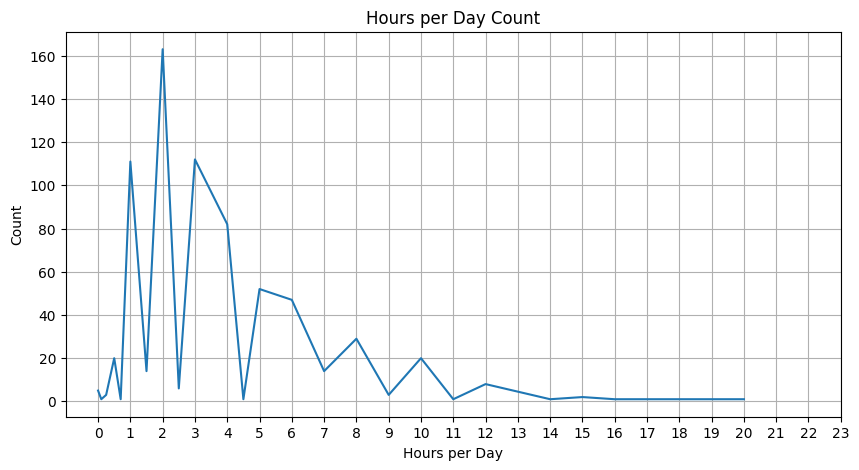

Hours per day
0.00       5
0.10       1
0.25       3
0.50      20
0.70       1
1.00     111
1.50      14
2.00     163
2.50       6
3.00     112
4.00      82
4.50       1
5.00      52
6.00      47
7.00      14
8.00      29
9.00       3
10.00     20
11.00      1
12.00      8
14.00      1
15.00      2
16.00      1
18.00      1
20.00      1
Name: count, dtype: int64

In [13]:
hours_per_day_count = df['Hours per day'].value_counts().sort_index(ascending=True)
plt.figure(figsize=(10, 5))
sns.lineplot(data=hours_per_day_count, markers=True, dashes=False)
plt.title('Hours per Day Count')
plt.xlabel('Hours per Day')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(np.arange(0, 24, 1))
plt.show()
df['Hours per day'].value_counts().sort_index(ascending=True)

**Insight:** *Most respondents listen for 1 to 3 hours.*

## **Create a new 'Age_Group' column based on age ranges:**

In [14]:
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[0, 18, 35, 60, 75, 100],
                         labels=['Early Years', 'Young Adults', 'Middle Age', 'Mature Adults', 'Elderly'])
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Age_Group
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,Early Years
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,Mature Adults
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,Early Years
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,Early Years
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,Early Years


## **Age Distribution**

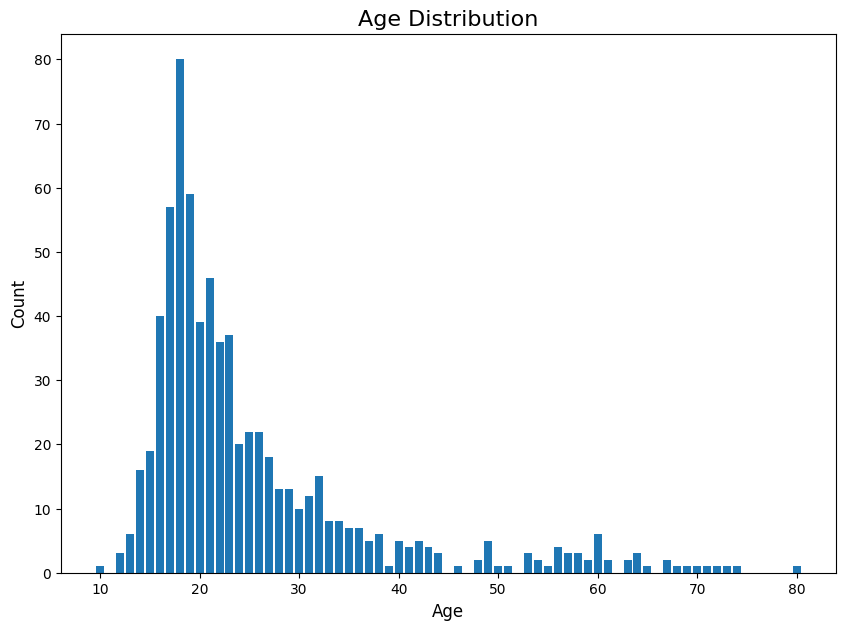

In [15]:
labels = df['Age'].value_counts().index.to_list()
sections = df['Age'].value_counts().to_numpy()
plt.figure(figsize=(10, 7))
plt.bar(labels, sections)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## **Distribution of Age Group**

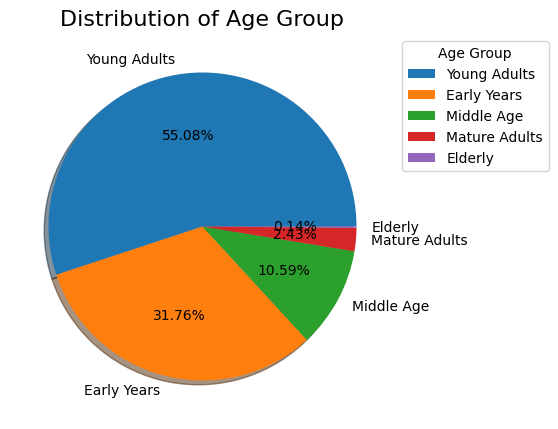

In [16]:
age_group_counts = df['Age_Group'].value_counts()
labels = age_group_counts.index.to_list()
plt.figure(figsize=(5,5))
plt.pie(age_group_counts, labels=labels,autopct='%.2f%%',shadow=True, pctdistance=0.6)
plt.title('Distribution of Age Group', fontsize=16)
plt.legend(title='Age Group', loc='upper left',bbox_to_anchor=(1,1))
plt.show()

**Insight:** *Most respondents are young adults and children*.

## **Primary streaming service used**

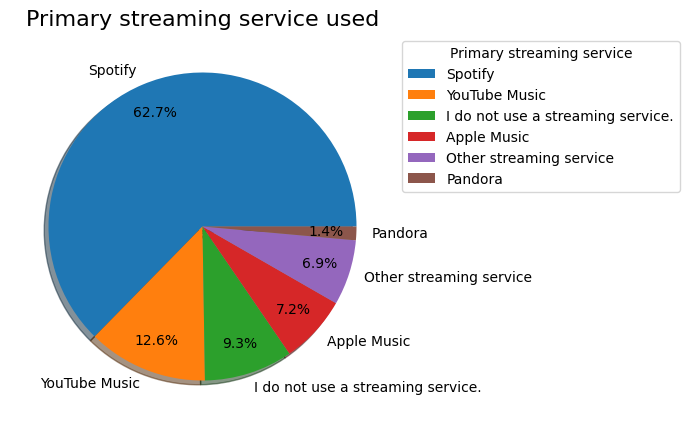

In [17]:
sections = df['Primary streaming service'].value_counts()
labels = sections.index.to_list()
plt.figure(figsize=(5,5))
plt.pie(sections, labels=labels,autopct='%.1f%%',shadow=True, pctdistance=0.8)
plt.title('Primary streaming service used', fontsize=16)
plt.legend(title='Primary streaming service',loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

**Insight:** *Most listener use Spotify and YouTube Music for streaming.*

## **Listens to music While working**

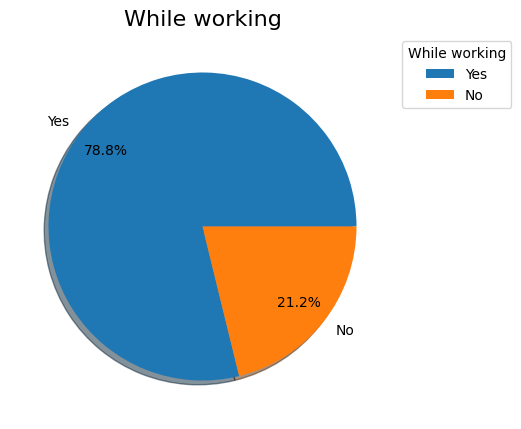

In [18]:
sections = df['While working'].value_counts()
labels = sections.index.to_list()
plt.figure(figsize=(5,5))
plt.pie(sections, labels=labels,autopct='%.1f%%',shadow=True, pctdistance=0.8)
plt.title('While working', fontsize=16)
plt.legend(title='While working',loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


**Insight:** *Most listener listen to music while working.*

## **Listener is an Instrumentalist**

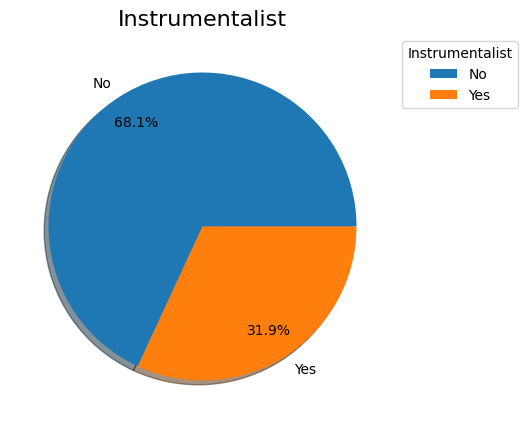

In [19]:
sections = df['Instrumentalist'].value_counts()
labels = sections.index.to_list()
plt.figure(figsize=(5, 5))
plt.pie(sections, labels=labels, autopct='%.1f%%', shadow=True, pctdistance=0.8)
plt.title('Instrumentalist', fontsize=16)
plt.legend(title='Instrumentalist', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## **Listener is a Composer**

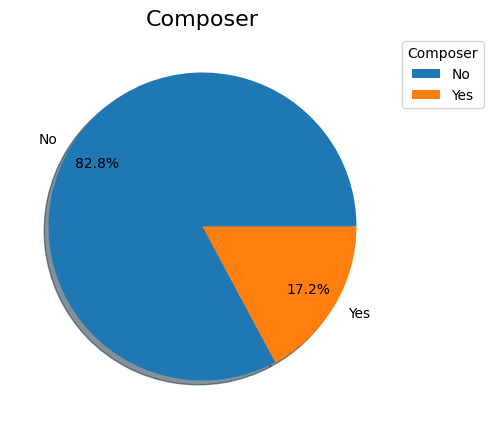

In [20]:
sections = df['Composer'].value_counts()
labels = sections.index.to_list()
plt.figure(figsize=(5, 5))
plt.pie(sections, labels=labels, autopct='%.1f%%', shadow=True, pctdistance=0.8)
plt.title('Composer', fontsize=16)
plt.legend(title='Composer', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## **Listener actively explore new artists/genres**

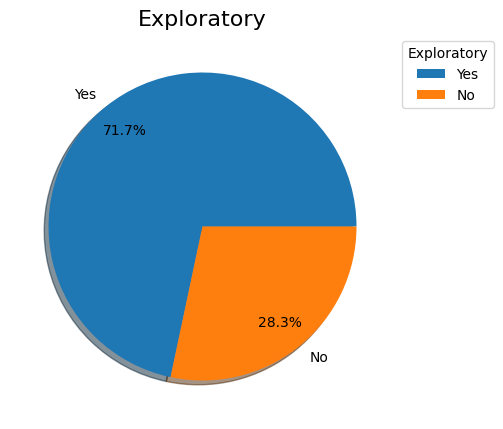

In [21]:
sections = df['Exploratory'].value_counts()
labels = sections.index.to_list()
plt.figure(figsize=(5, 5))
plt.pie(sections, labels=labels, autopct='%.1f%%', shadow=True, pctdistance=0.8)
plt.title('Exploratory', fontsize=16)
plt.legend(title='Exploratory', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## **Listener listens to music in Foreign languages**

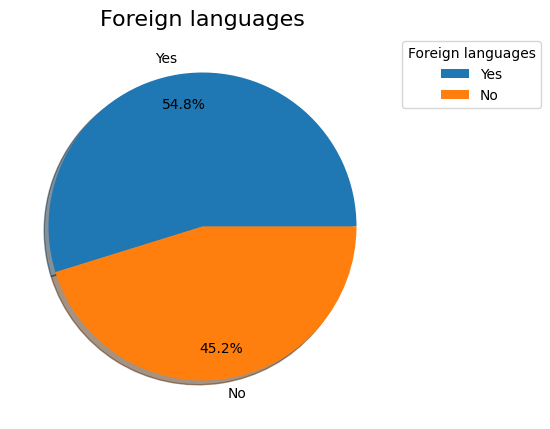

In [22]:
sections = df['Foreign languages'].value_counts()
labels = sections.index.to_list()
plt.figure(figsize=(5, 5))
plt.pie(sections, labels=labels, autopct='%.1f%%', shadow=True, pctdistance=0.8)
plt.title('Foreign languages', fontsize=16)
plt.legend(title='Foreign languages', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## **Distribution of Fav genre**

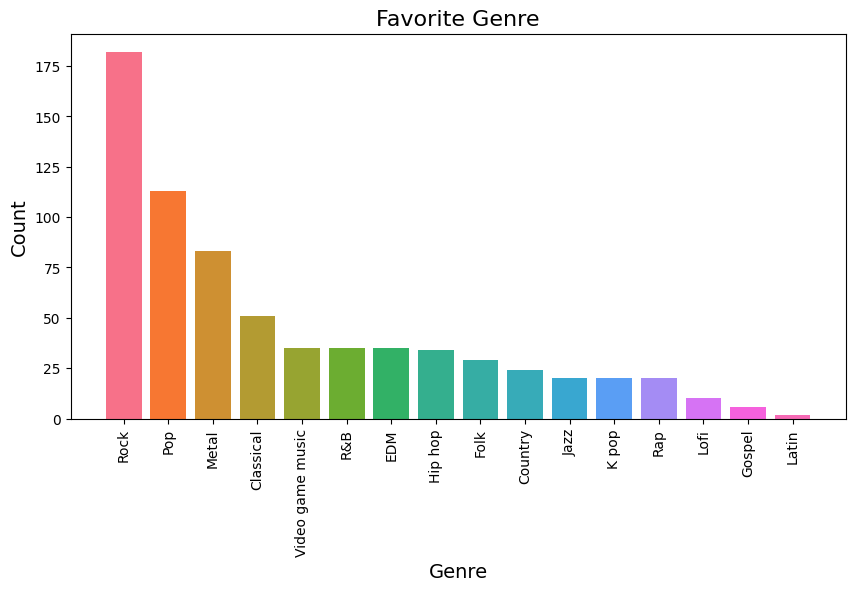

In [23]:
labels = df['Fav genre'].value_counts().index.to_list()
sections = df['Fav genre'].value_counts().to_numpy()
colors = sns.color_palette('husl', len(sections))
plt.figure(figsize=(10,5))
plt.bar(labels, sections, color=colors)
plt.title('Favorite Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()

## **Distribution of Fav genre over age**

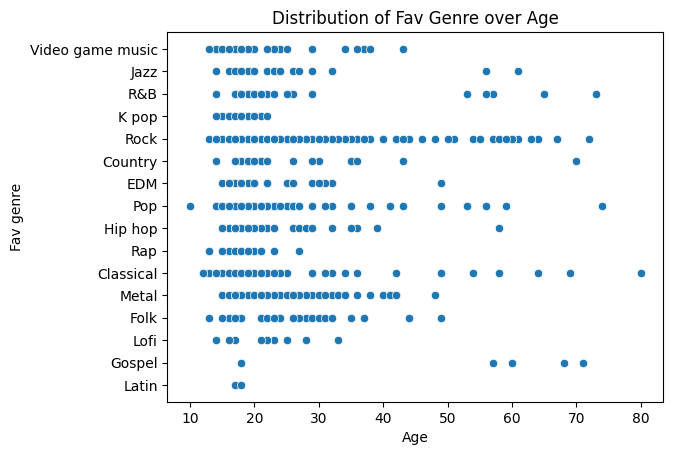

In [24]:
sns.scatterplot(data=df, x="Age", y="Fav genre")
plt.title('Distribution of Fav Genre over Age')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


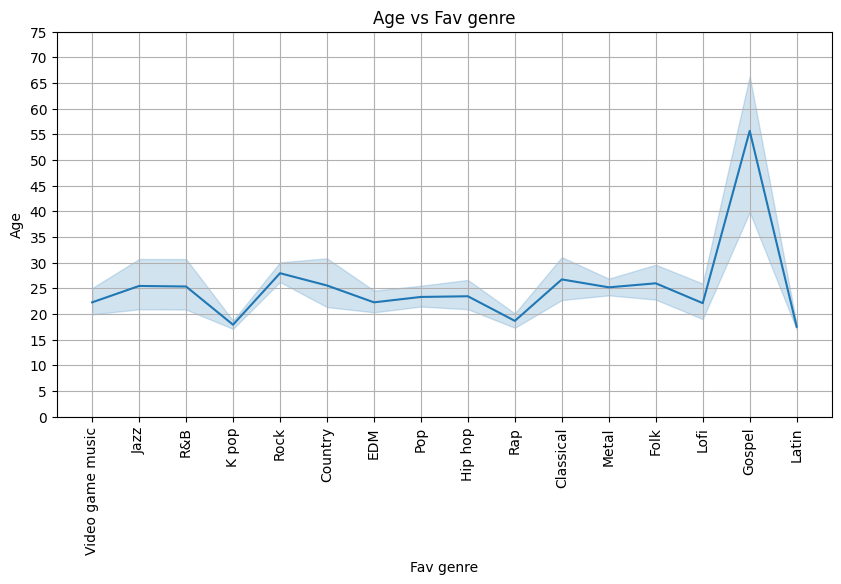

In [25]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="Fav genre", y="Age", markers=True, dashes=False)
plt.title('Age vs Fav genre')
plt.grid(True)
plt.yticks(np.arange(0, 80, 5))
plt.xticks(rotation=90)
plt.show()

## **Frequency of each music genre**

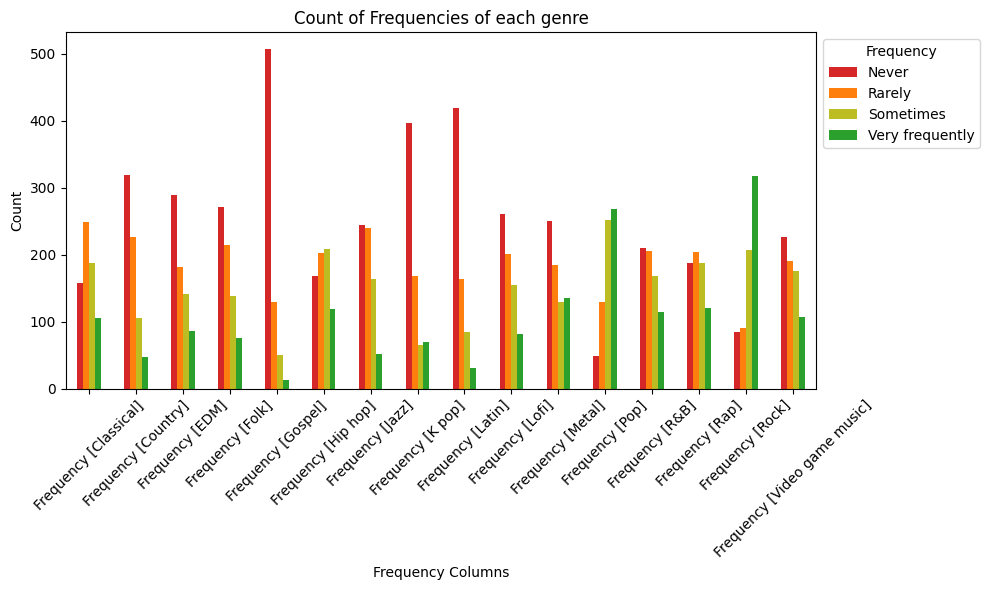

In [26]:
counts = {}

# Define the list of frequencies columns
frequencies_cols = ['Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
                    'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
                    'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
                    'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]']

# Loop through each frequency column
for col in frequencies_cols:
    # Get the value counts for the current column
    value_counts = df[col].value_counts()

    # Extract the counts for the desired categories
    sometimes_count = value_counts.get('Sometimes', 0)
    rarely_count = value_counts.get('Rarely', 0)
    very_frequently_count = value_counts.get('Very frequently', 0)
    never_count = value_counts.get('Never', 0)

    # Store the counts in the dictionary
    counts[col] = {
        'Never': never_count,
        'Rarely': rarely_count,
        'Sometimes': sometimes_count,
        'Very frequently': very_frequently_count
    }

# Create a DataFrame from the dictionary
df_counts = pd.DataFrame(counts).T

# Plot the bar chart
df_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['tab:red', 'tab:orange', 'tab:olive', 'tab:green'])
plt.title('Count of Frequencies of each genre')
plt.xlabel('Frequency Columns')
plt.ylabel('Count')
plt.legend(title='Frequency', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Mean Depression levels of Listeners of each Genre**

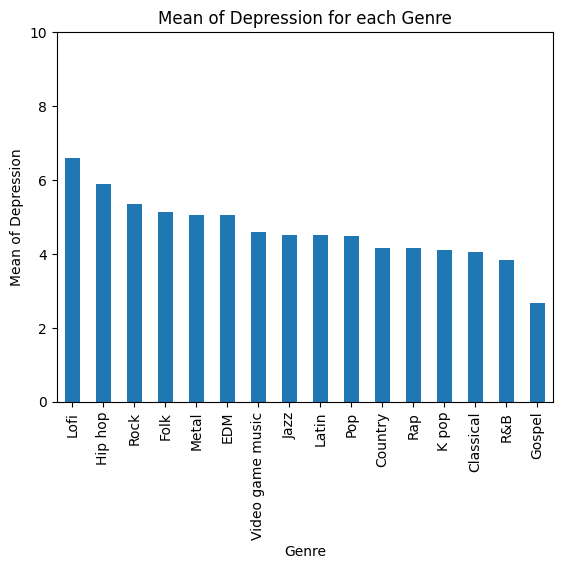

In [27]:
df.groupby('Fav genre')['Depression'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Mean of Depression for each Genre')
plt.xlabel('Genre')
plt.ylabel('Mean of Depression')
plt.ylim(0,10)
plt.show()

## **Mean Anxiety levels of Listeners of each Genre**

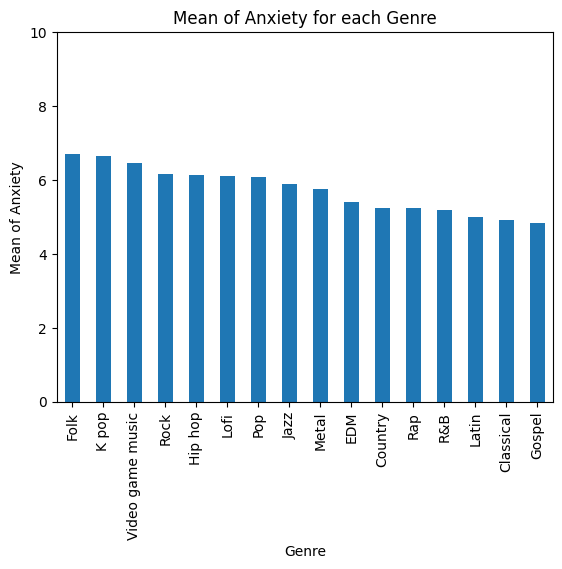

In [28]:
df.groupby('Fav genre')['Anxiety'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Mean of Anxiety for each Genre')
plt.xlabel('Genre')
plt.ylabel('Mean of Anxiety')
plt.ylim(0,10)
plt.show()

## **Mean Insomnia levels of Listeners of each Genre**

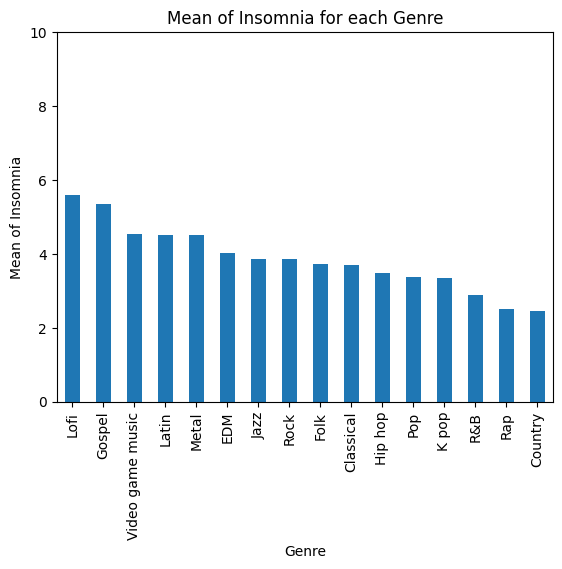

In [29]:
df.groupby('Fav genre')['Insomnia'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Mean of Insomnia for each Genre')
plt.xlabel('Genre')
plt.ylabel('Mean of Insomnia')
plt.ylim(0,10)
plt.show()

## **Mean OCD levels of Listeners of each Genre**

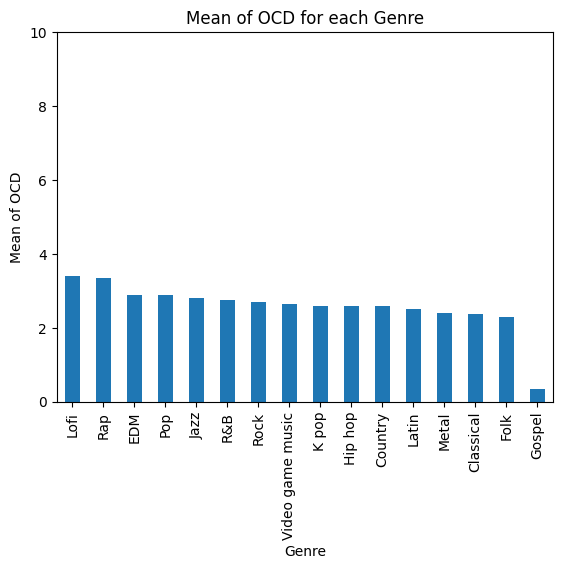

In [30]:
df.groupby('Fav genre')['OCD'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Mean of OCD for each Genre')
plt.xlabel('Genre')
plt.ylabel('Mean of OCD')
plt.ylim(0,10)
plt.show()

## **Column for mean level of disorder**

In [31]:
df['Mean_Disorders'] = (df['Depression'] + df['Anxiety'] + df['Insomnia'] + df['OCD'])/4
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Age_Group,Mean_Disorders
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,Early Years,6.50
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,Mature Adults,5.50
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,Early Years,5.75
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,Early Years,7.50
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,Early Years,4.50


## **Mean Mental Health Disorder levels of Listeners of each Genre**

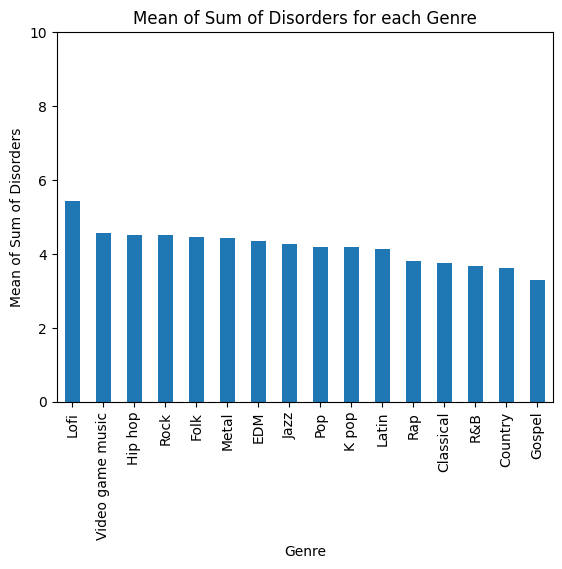

In [32]:
df.groupby('Fav genre')['Mean_Disorders'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Mean of Sum of Disorders for each Genre')
plt.xlabel('Genre')
plt.ylabel('Mean of Sum of Disorders')
plt.ylim(0,10)
plt.show()

## **Count of Disorder Levels**

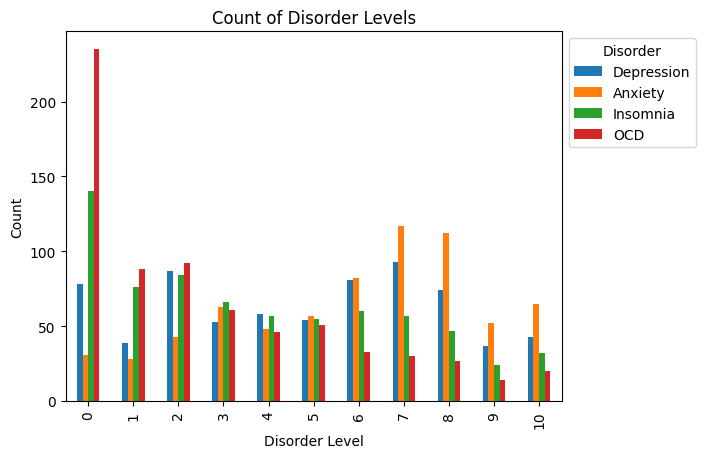

In [33]:
# Create a dictionary to store the counts
disorder_counts = {
    'Depression': {},
    'Anxiety': {},
    'Insomnia': {},
    'OCD': {}
}

# Loop through the disorder columns
for disorder in ['Depression', 'Anxiety', 'Insomnia', 'OCD']:
    # Get the value counts for the current disorder
    value_counts = df[disorder].value_counts()

    # Extract the counts for the desired categories
    for level in range(11):
        disorder_counts[disorder][level] = value_counts.get(level, 0)

# Create a DataFrame from the dictionary
df_disorder_counts = pd.DataFrame(disorder_counts)

# Plot the bar chart for each disorder
df_disorder_counts.plot(kind='bar')
plt.title('Count of Disorder Levels')
plt.xlabel('Disorder Level')
plt.ylabel('Count')
plt.legend(title='Disorder', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


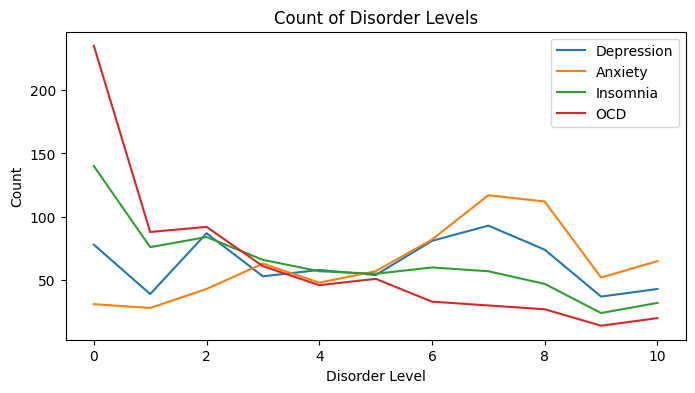

In [34]:
df_disorder_counts.plot(kind='line', figsize=(8, 4))
plt.title('Count of Disorder Levels')
plt.xlabel('Disorder Level')
plt.ylabel('Count')
plt.show()

## **Mean of Disorders**

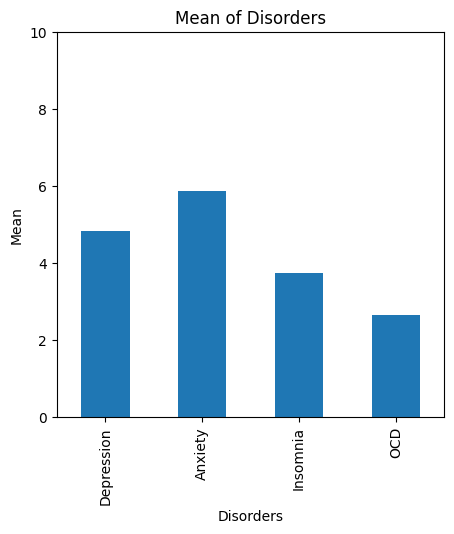

In [35]:
df[['Depression', 'Anxiety', 'Insomnia', 'OCD']].mean(axis=0).plot(kind='bar', figsize=(5,5))
plt.title('Mean of Disorders')
plt.xlabel('Disorders')
plt.ylabel('Mean')
plt.ylim(0,10)
plt.show()

## **Distribution of Genre in each Age group**

/tmp/ipykernel_18/1832738333.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = df.groupby('Age_Group')['Fav genre'].value_counts(normalize=True) * 100


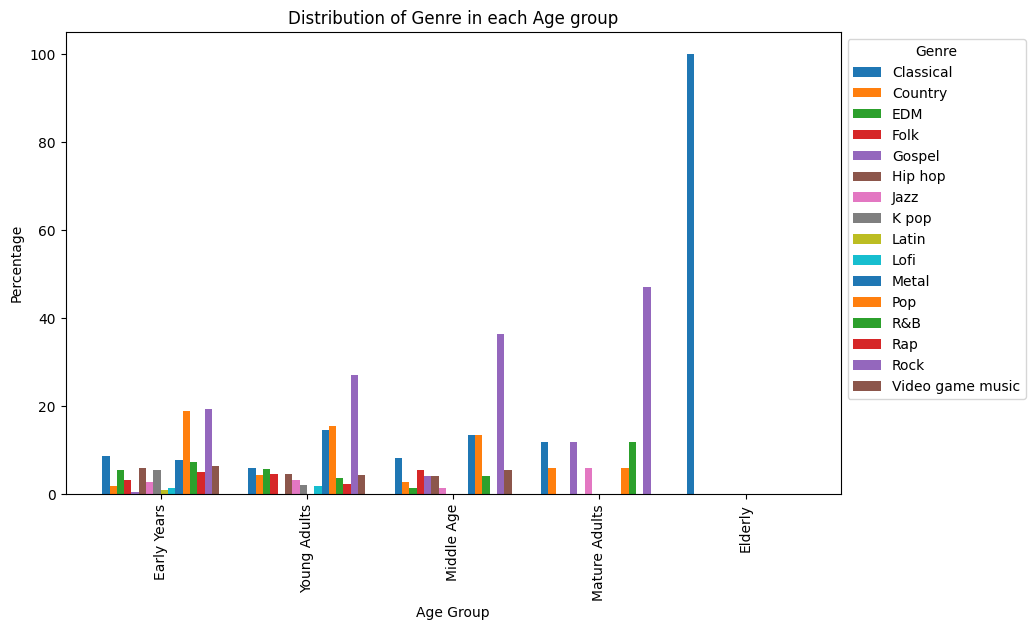

In [36]:
age_groups = df.groupby('Age_Group')['Fav genre'].value_counts(normalize=True) * 100
age_groups.unstack().plot(kind='bar', stacked=False, figsize=(10, 6), width = 0.8)
plt.title('Distribution of Genre in each Age group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## **Age group distribution in Genre**

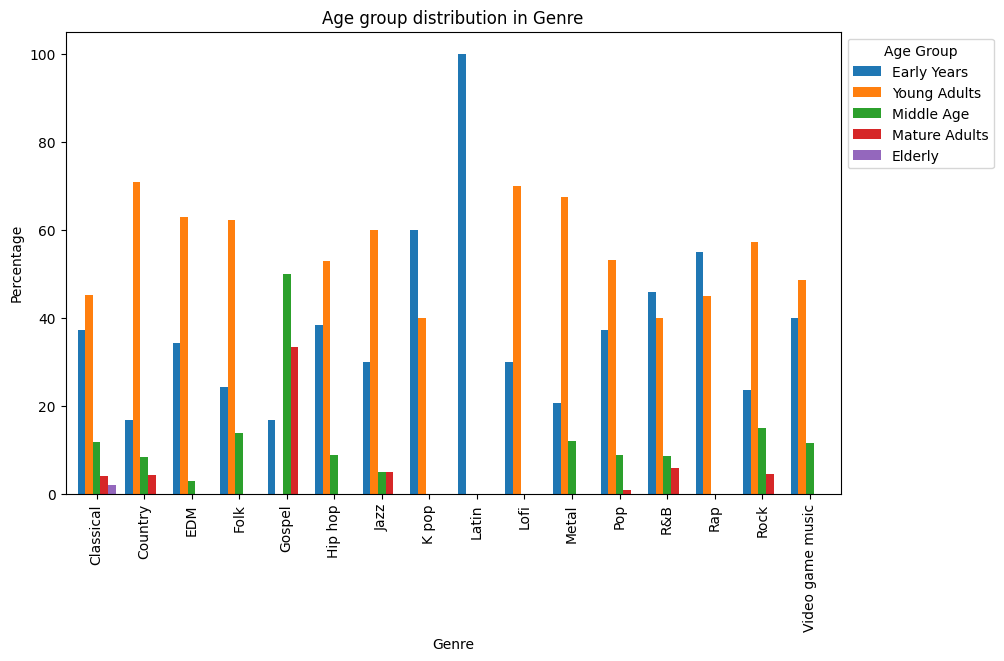

In [37]:
age_groups = df.groupby('Fav genre')['Age_Group'].value_counts(normalize=True) * 100
age_groups.unstack().plot(kind='bar', stacked=False, figsize=(10, 6), width = 0.8)
plt.title('Age group distribution in Genre')
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## **Effect of music**

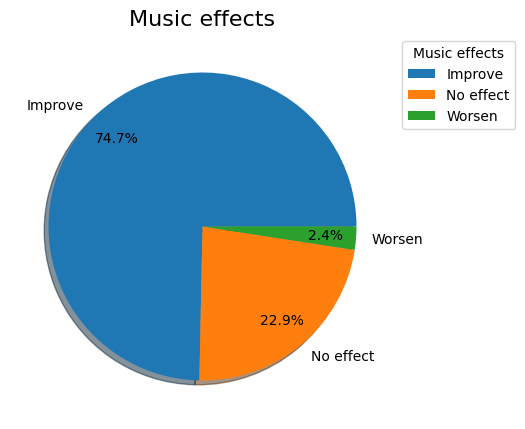

In [38]:
sections = df['Music effects'].value_counts()
labels = sections.index.to_list()
plt.figure(figsize=(5,5))
plt.pie(sections, labels=labels,autopct='%.1f%%',shadow=True, pctdistance=0.8)
plt.title('Music effects', fontsize=16)
plt.legend(title='Music effects',loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## **Music effects of each genre**

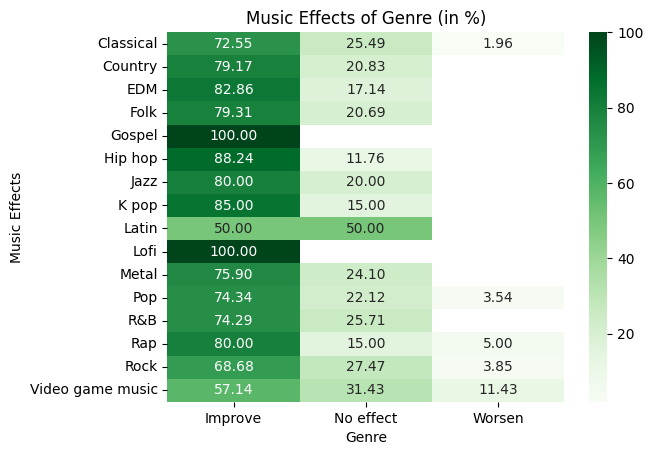

In [39]:
music_effects_per_genre = df.groupby('Fav genre')['Music effects'].value_counts(normalize=True).unstack() * 100
sns.heatmap(music_effects_per_genre, annot=True, fmt=".2f", cmap="Greens")
plt.title("Music Effects of Genre (in %)")
plt.xlabel("Genre")
plt.ylabel("Music Effects")
plt.show()

## **Music effect in age group**

/tmp/ipykernel_18/900432884.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = df.groupby('Age_Group')['Music effects'].value_counts(normalize=True) * 100


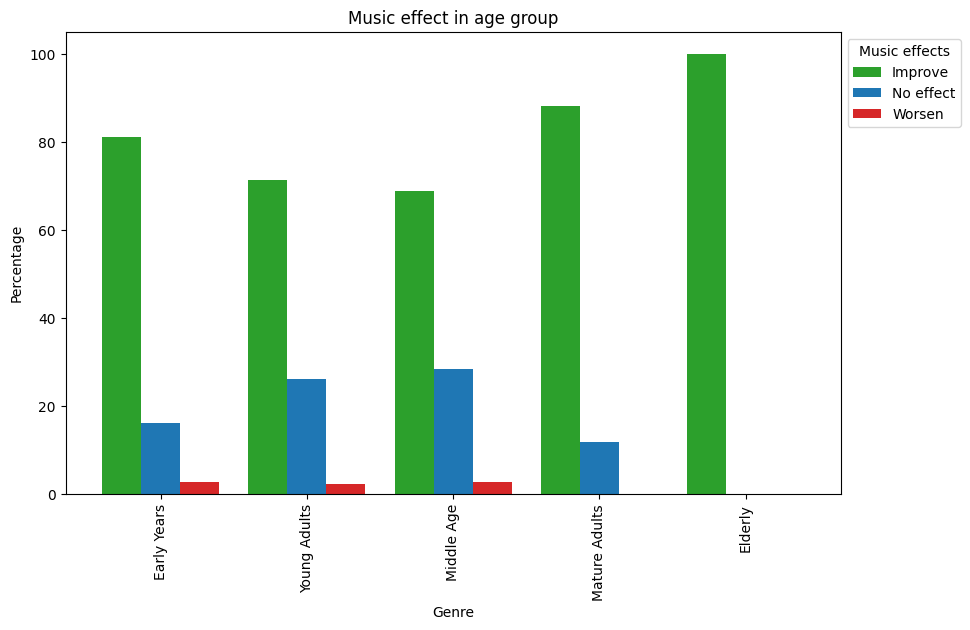

In [40]:
age_groups = df.groupby('Age_Group')['Music effects'].value_counts(normalize=True) * 100
age_groups.unstack().plot(kind='bar', stacked=False, figsize=(10, 6), width = 0.8,color=['tab:green','tab:blue','tab:red'])
plt.title('Music effect in age group')
plt.xlabel('Genre')
plt.ylabel('Percentage')
plt.legend(title='Music effects', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## **Average Hours per Day of each Age Group**

/tmp/ipykernel_18/3374396663.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Hours per day'].mean().plot(kind='bar')


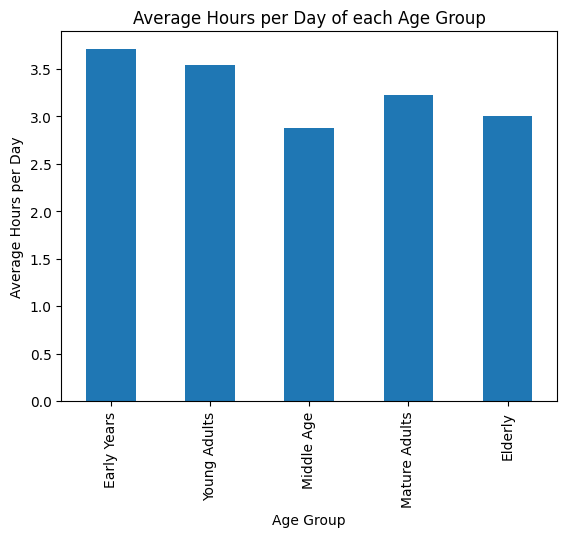

In [41]:
df.groupby('Age_Group')['Hours per day'].mean().plot(kind='bar')
plt.title('Average Hours per Day of each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Hours per Day')
plt.show()

# **Insights**

- The majority of the respondents are young adults (18-35 years old).
- The most popular streaming service is Spotify, followed by YouTube Music and Apple Music.
- Most respondents listen to music while working, with a significant proportion also listening while studying or relaxing.
- A large majority of respondents are not instrumentalists or composers.
- The majority of respondents actively explore new artists and genres, and a significant proportion listen to music in foreign languages.
- The most popular music genre is Rock, followed by Pop and Metal.
- The mean level of mental health disorders is highest among listeners of Lofi and Video game music.
- The distribution of genres varies across age groups, with rock and pop music being the most popular among young adults and middle-aged listeners, gospel and classical music being the most popular among older adults.
- Music has a positive effect on the majority of respondents, with the most common effects being relaxation, mood improvement, and stress reduction.
- The average number of hours spent listening to music per day is highest among young listeners (5-35 years old).

# **Recommendations**

- Music streaming services could consider targeting young adults and middle-aged listeners with personalized recommendations and marketing campaigns.
- Music therapists and counselors could consider using music to help clients relax, improve their mood, and reduce stress.
- Music educators could consider incorporating a wider variety of genres into their curricula, including classical music and rock.
- Music venues and festivals could consider booking a wider range of artists, including those from underrepresented genres.